In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [59]:
# Load and Explore Dataset
data = pd.read_csv('/content/drive/My Drive/data/shuffled.csv')
df = pd.DataFrame(data)
df

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943
...,...,...,...,...,...,...
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB
None


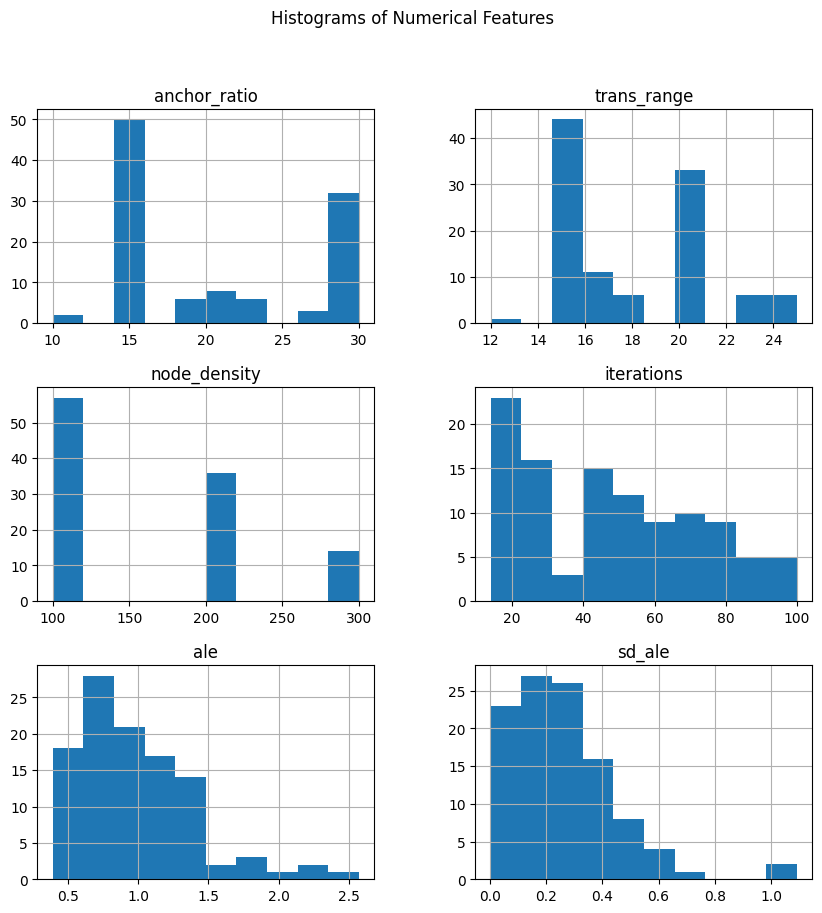

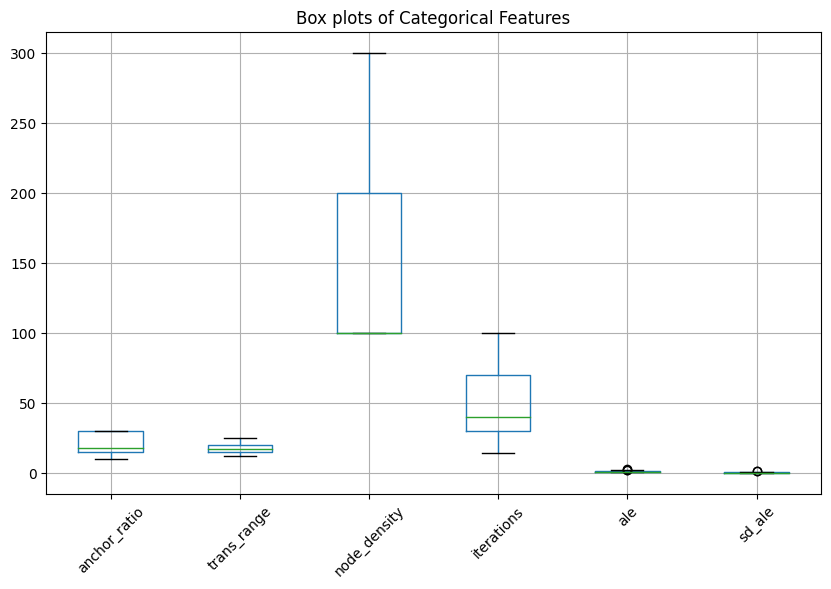

In [60]:

# Display dataset info
print("Dataset Information:")
print(df.info())

df.hist(figsize=(10, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots for categorical features
df.boxplot(figsize=(10, 6))
plt.title("Box plots of Categorical Features")
plt.xticks(rotation=45)
plt.show()

In [61]:
# Remove Duplicates
dup = df.drop_duplicates()

imputed = dup.fillna(dup.mean())

# Display info after handling missing values
print("\nDataset Information after handling missing values:")
print(imputed.info())


Dataset Information after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB
None


In [ ]:
df.isnull().sum()*100/df.shape[0]

anchor_ratio    0.0
trans_range     0.0
node_density    0.0
iterations      0.0
ale             0.0
sd_ale          0.0
dtype: float64

In [ ]:
# Feature Selection and Preprocessing
X = imputed.drop(columns=['ale'])  # All features except target variable
y = imputed['sd_ale']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#  Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# Model Evaluation and Visualization
y_pred = model.predict(X_test_scaled)

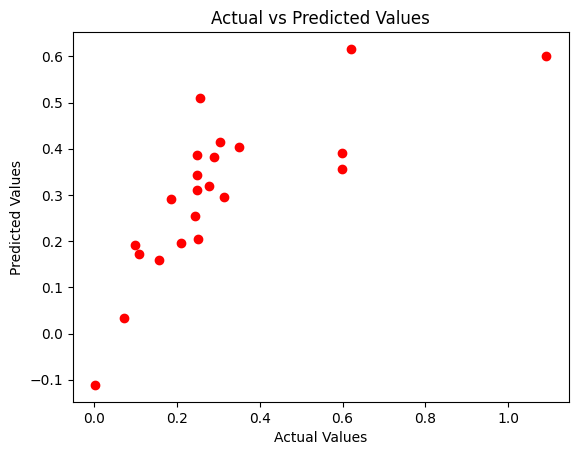

In [ ]:
# Scatter plot for Actual vs Predicted Values
plt.scatter(y_test, y_pred, color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Metrics Calculation
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 0.02304891473838856
Root Mean Squared Error: 0.15181869034604586
Mean Absolute Error: 0.10450722583608134
R-squared Score: 0.5727450148670317


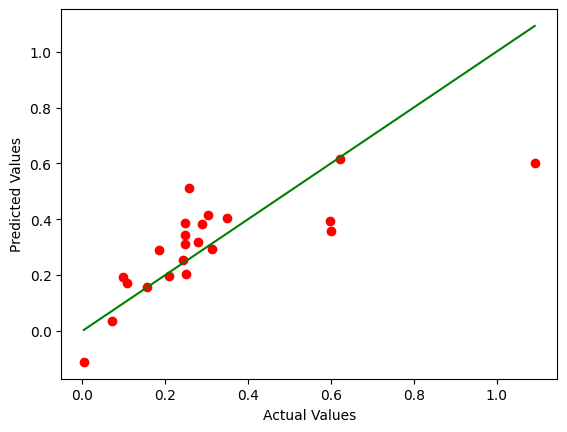

In [ ]:
# Scatter plot with regression line
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()